In [2]:
#En este archivo ipynb vamos a desmenuzar el xlsx original para poder trabajar con la solapa 'victimas':

In [3]:
import pandas as pd

In [4]:
#Cargamos cada hoja del archivo xlsx

df_victimas = pd.read_excel('Datasets_originales/homicidios.xlsx', sheet_name='VICTIMAS')



In [5]:
df_victimas_copy = df_victimas.copy()

In [6]:
#pasamos todos los nombres de las columnas a mayúsculas:
df_victimas_copy.columns = df_victimas_copy.columns.str.upper()

In [7]:
df_victimas_copy.head(1)

,ID_HECHO,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


In [8]:
df_victimas_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_HECHO             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [9]:
# BUSCAR todas las celdas que contengan la palabra 'SD'
# Crear una máscara booleana donde True indica que la celda contiene 'SD'
mask = df_victimas_copy.applymap(lambda x: 'SD' in str(x))

/var/folders/bf/f2bv9fls2wl6xxl27gbh6lnc0000gn/T/ipykernel_80088/2124851330.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df_victimas_copy.applymap(lambda x: 'SD' in str(x))


In [10]:
# Imprimir las filas donde al menos una celda contiene 'SD'
(df_victimas_copy[mask.any(axis=1)]).shape

(109, 10)

In [11]:
#Al ver que hay 109 filas con 'SD' en alguna celda, vamos a buscar en qué columnas se encuentran:
# Crear una máscara booleana donde True indica que la celda contiene 'SD'
mask = df_victimas_copy.apply(lambda x: x.str.contains('SD').any() if x.dtype == "object" else False)

# Imprimir las columnas donde al menos una celda contiene 'SD'
print(df_victimas_copy.columns[mask])

Index(['ROL', 'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'], dtype='object')


In [12]:
#mostrar las filas que contienen SD en la columna 'ROL':
print('La cantidad de filas con SD en la columna ROL es:', df_victimas_copy[df_victimas_copy['ROL'].str.contains('SD', na=False)].shape[0])
print('Fila con SD en la columna ROL:')
print(df_victimas_copy[df_victimas_copy['ROL'].str.contains('SD', na=False)])
print('\n')

La cantidad de filas con SD en la columna ROL es: 11
Fila con SD en la columna ROL:
      ID_HECHO      FECHA  AAAA  MM  DD ROL VICTIMA       SEXO EDAD  \
36   2016-0049 2016-04-17  2016   4  17  SD      SD         SD   SD   
39   2016-0052 2016-04-20  2016   4  20  SD    MOTO         SD   SD   
63   2016-0085 2016-06-29  2016   6  29  SD    MOTO  MASCULINO   SD   
77   2016-0101 2016-08-07  2016   8   7  SD      SD  MASCULINO   67   
89   2016-0115 2016-09-02  2016   9   2  SD      SD  MASCULINO   SD   
141  2016-0174 2016-12-27  2016  12  27  SD      SD         SD   SD   
167  2017-0029 2017-03-07  2017   3   7  SD      SD  MASCULINO   34   
208  2017-0074 2017-06-04  2017   6   4  SD      SD  MASCULINO   70   
221  2017-0089 2017-07-13  2017   7  13  SD      SD  MASCULINO   23   
280  2017-0155 2017-12-12  2017  12  12  SD      SD  MASCULINO   77   
390  2018-0100 2018-09-20  2018   9  20  SD    MOTO   FEMENINO   33   

     FECHA_FALLECIMIENTO  
36                    SD  
39       

In [13]:
#mostrar las filas que contienen SD en la columna 'VICTIMA':
print('La cantidad de filas con SD en la columna VICTIMA es:', df_victimas_copy[df_victimas_copy['VICTIMA'].str.contains('SD', na=False)].shape[0])
print('Fila con SD en la columna VICTIMA:')
print(df_victimas_copy[df_victimas_copy['VICTIMA'].str.contains('SD', na=False)])
print('\n')

La cantidad de filas con SD en la columna VICTIMA es: 9
Fila con SD en la columna VICTIMA:
      ID_HECHO      FECHA  AAAA  MM  DD                   ROL VICTIMA  \
36   2016-0049 2016-04-17  2016   4  17                    SD      SD   
77   2016-0101 2016-08-07  2016   8   7                    SD      SD   
89   2016-0115 2016-09-02  2016   9   2                    SD      SD   
93   2016-0119 2016-09-04  2016   9   4  PASAJERO_ACOMPAÑANTE      SD   
141  2016-0174 2016-12-27  2016  12  27                    SD      SD   
167  2017-0029 2017-03-07  2017   3   7                    SD      SD   
208  2017-0074 2017-06-04  2017   6   4                    SD      SD   
221  2017-0089 2017-07-13  2017   7  13                    SD      SD   
280  2017-0155 2017-12-12  2017  12  12                    SD      SD   

          SEXO EDAD  FECHA_FALLECIMIENTO  
36          SD   SD                   SD  
77   MASCULINO   67                   SD  
89   MASCULINO   SD                   SD  
93    

In [14]:
#mostrar las filas que contienen SD en la columna 'SEXO':
print('La cantidad de filas con SD en la columna SEXO es:', df_victimas_copy[df_victimas_copy['SEXO'].str.contains('SD', na=False)].shape[0])
print('Fila con SD en la columna SEXO:')
print(df_victimas_copy[df_victimas_copy['SEXO'].str.contains('SD', na=False)])
print('\n')

La cantidad de filas con SD en la columna SEXO es: 6
Fila con SD en la columna SEXO:
      ID_HECHO      FECHA  AAAA  MM  DD        ROL VICTIMA SEXO EDAD  \
36   2016-0049 2016-04-17  2016   4  17         SD      SD   SD   SD   
39   2016-0052 2016-04-20  2016   4  20         SD    MOTO   SD   SD   
108  2016-0136 2016-10-25  2016  10  25  CONDUCTOR    MOTO   SD   SD   
121  2016-0151 2016-11-18  2016  11  18     PEATON  PEATON   SD   SD   
138  2016-0171 2016-12-25  2016  12  25  CONDUCTOR    MOTO   SD   SD   
141  2016-0174 2016-12-27  2016  12  27         SD      SD   SD   SD   

    FECHA_FALLECIMIENTO  
36                   SD  
39                   SD  
108                  SD  
121                  SD  
138                  SD  
141                  SD  




In [15]:
#mostrar las filas que contienen SD en la columna 'EDAD':
print('La cantidad de filas con SD en la columna EDAD es:', df_victimas_copy[df_victimas_copy['EDAD'].str.contains('SD', na=False)].shape[0])
print('Fila con SD en la columna EDAD:')
print(df_victimas_copy[df_victimas_copy['EDAD'].str.contains('SD', na=False)])
print('\n')

La cantidad de filas con SD en la columna EDAD es: 53
Fila con SD en la columna EDAD:
      ID_HECHO      FECHA  AAAA  MM  DD                   ROL    VICTIMA  \
30   2016-0041 2016-03-29  2016   3  29  PASAJERO_ACOMPAÑANTE       MOTO   
33   2016-0045 2016-04-11  2016   4  11             CONDUCTOR       MOTO   
35   2016-0048 2016-04-15  2016   4  15                PEATON     PEATON   
36   2016-0049 2016-04-17  2016   4  17                    SD         SD   
39   2016-0052 2016-04-20  2016   4  20                    SD       MOTO   
55   2016-0077 2016-06-13  2016   6  13                PEATON     PEATON   
63   2016-0085 2016-06-29  2016   6  29                    SD       MOTO   
72   2016-0096 2016-07-25  2016   7  25             CONDUCTOR       MOTO   
89   2016-0115 2016-09-02  2016   9   2                    SD         SD   
93   2016-0119 2016-09-04  2016   9   4  PASAJERO_ACOMPAÑANTE         SD   
108  2016-0136 2016-10-25  2016  10  25             CONDUCTOR       MOTO   
11

In [16]:
#mostrar las filas que contienen SD en la columna 'FECHA_FALLECIMIENTO':
print('La cantidad de filas con SD en la columna FECHA_FALLECIMIENTO es:', df_victimas_copy[df_victimas_copy['FECHA_FALLECIMIENTO'].str.contains('SD', na=False)].shape[0])
print('Fila con SD en la columna FECHA_FALLECIMIENTO:')
print(df_victimas_copy[df_victimas_copy['FECHA_FALLECIMIENTO'].str.contains('SD', na=False)])
print('\n')

La cantidad de filas con SD en la columna FECHA_FALLECIMIENTO es: 68
Fila con SD en la columna FECHA_FALLECIMIENTO:
      ID_HECHO      FECHA  AAAA  MM  DD                   ROL VICTIMA  \
3    2016-0004 2016-01-10  2016   1  10             CONDUCTOR    MOTO   
16   2016-0022 2016-02-21  2016   2  21  PASAJERO_ACOMPAÑANTE    MOTO   
19   2016-0027 2016-02-28  2016   2  28  PASAJERO_ACOMPAÑANTE    AUTO   
22   2016-0031 2016-03-08  2016   3   8             CONDUCTOR    MOTO   
33   2016-0045 2016-04-11  2016   4  11             CONDUCTOR    MOTO   
..         ...        ...   ...  ..  ..                   ...     ...   
221  2017-0089 2017-07-13  2017   7  13                    SD      SD   
242  2017-0112 2017-09-10  2017   9  10  PASAJERO_ACOMPAÑANTE    AUTO   
246  2017-0115 2017-09-19  2017   9  19             CONDUCTOR    MOTO   
253  2017-0126 2017-10-14  2017  10  14  PASAJERO_ACOMPAÑANTE    AUTO   
280  2017-0155 2017-12-12  2017  12  12                    SD      SD   

       

In [17]:
df_victimas_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_HECHO             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [18]:
#Decido dejar las filas con 'SD' en las columnas 'ROL', 'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'ya que usaremos esos datos para el análisis, haciendo incapie en la importancia a futuro de la colocacion de esos datos en las planillas de origen.

In [19]:
print(df_victimas_copy['SEXO'].value_counts())

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64


<Axes: xlabel='SEXO'>

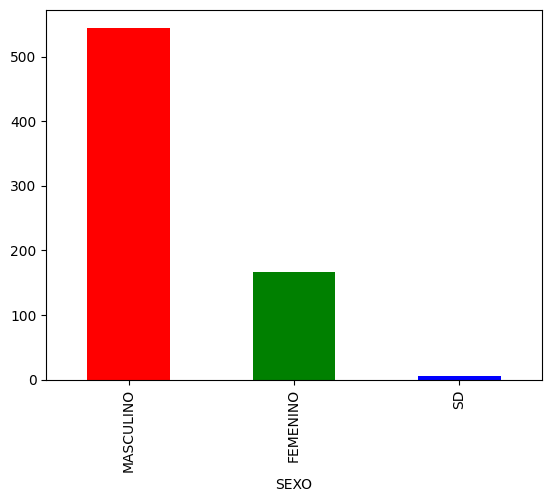

In [20]:
#hacemos una pequeña grafica de barras de prueba para ver como se empiezan a ver los patrones, de la columna'Sexo'

df_victimas_copy['SEXO'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])

In [21]:
#En la columna 'EDAD' tenemos valores int y str(por el campo 'SD'), por eso en .info() nos dice object, ya que es la manera de nombrar PANDAS a una columna con multiples datos. Para hacer una nueva columna 'RANGO_ETARIO'lo que debemos hacer es convertir la columna 'EDAD' a numerica, dejando los valores SD como NaN, los mismos no seran tenidos en cuenta luego en Power BI, pero tampoco generará errores en la devolucion de informacion si le asignamos un valor numérico, sea 0 o el promedio de las edades 
df_victimas_copy['EDAD'] = pd.to_numeric(df_victimas_copy['EDAD'], errors='coerce')

In [22]:
#Ahora si agrupamos las edades por rangos etarios

df_victimas_copy['RANGO_ETARIO'] = pd.cut(df_victimas_copy['EDAD'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])


<Axes: xlabel='RANGO_ETARIO'>

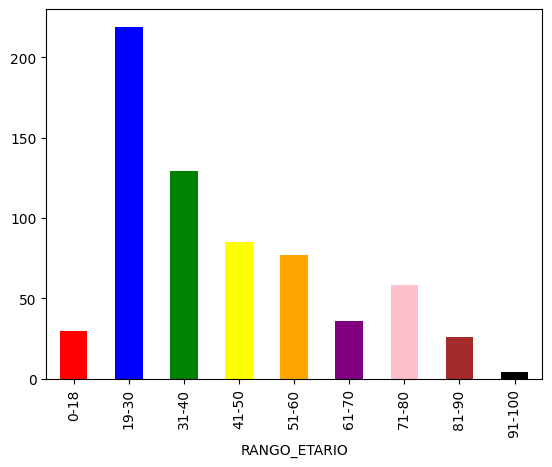

In [23]:
#Hacemos otro pequeño grafico de barras para ver como se empiezan a ver los patrones de las edades de forma ordenada:

df_victimas_copy['RANGO_ETARIO'].value_counts().sort_index().plot(kind='bar', color=['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black'])

/var/folders/bf/f2bv9fls2wl6xxl27gbh6lnc0000gn/T/ipykernel_80088/874706557.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_victimas_copy.groupby(['RANGO_ETARIO', 'SEXO']).size().unstack().plot(kind='bar', stacked=True, title='Cantidad de victimas por rango etario y sexo')


<Axes: title={'center': 'Cantidad de victimas por rango etario y sexo'}, xlabel='RANGO_ETARIO'>

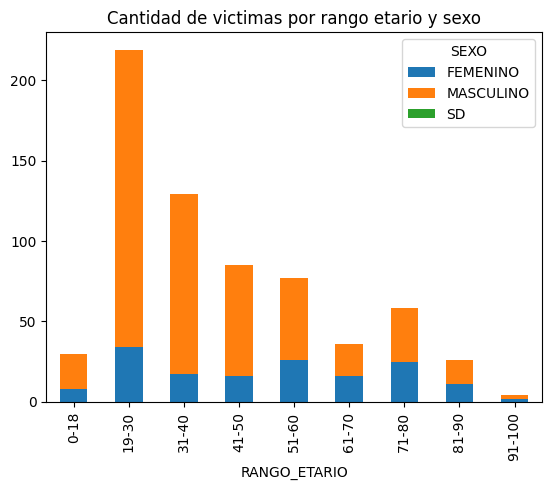

In [24]:
#Hacemos también una grafica de barras con la cantidad de filas de cada rango etario de la columna 'Rango_Etario' pero ordenada y con un color distinto y con un titulo y combinada con la columna 'Sexo'

df_victimas_copy.groupby(['RANGO_ETARIO', 'SEXO']).size().unstack().plot(kind='bar', stacked=True, title='Cantidad de victimas por rango etario y sexo')

In [27]:
# Guardamos el DataFrame limpio listo para usar en un archivo xlsx:
df_victimas_copy.to_excel('Datasets_limpios/df_victimas_ETL.xlsx', index=False)

In [26]:
# Guardamos el DataFrame limpio listo para usar en un archivo CSV: 

df_victimas_copy.to_csv('Datasets_limpios/df_victimas_ETL.csv', encoding='utf-8-sig', index=False)